In [ ]:
!pip install ffmpeg
import matplotlib.pyplot as plt
import cv2 as cv

In [ ]:
out_tryOn_DIR = './result/TOM/test/try-on'
!pip install torchvision==0.2.1
!pip install tensorboardX

In [ ]:
# get processed inputs
# !git clone https://github.com/SJSUMS/SMFAI.git

In [ ]:
# input video and target cloth
cloth_ID = 1
video = "./data/test/tryOnVideo.mp4"

In [ ]:
showColabVideo(video)

In [ ]:
# read inputs and convert frames to video
kpvideo = getKPVideo(video, 0, 4)

Construct keypoints video../result/out_kpVideo.mp4



In [ ]:
# read kps video
kpOut = "./result/out_kpVideo.mp4"
showColabVideo(kpOut)

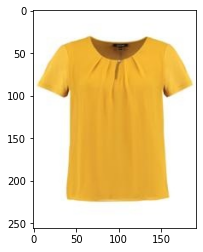

In [ ]:
_= plt.imshow(cv.imread("/content/drive/MyDrive/cp-vton-plus/data/test/cloth/000001_2.jpg")[:,:,::-1])

In [ ]:
%cd /content/drive/MyDrive/cp-vton-plus
!python test.py \
--dataroot data \
--data_list testPairs_1.txt

from PIL import Image
import shutil
import os

src_warp_cloth = 'result/GMM/test/warp-cloth'
src_warp_mask = 'result/GMM/test/warp-mask'

dest_warp_cloth = 'data/test/warp-cloth'
dest_warp_mask = 'data/test/warp-mask'

if os.path.exists(dest_warp_cloth):
  shutil.rmtree(dest_warp_cloth)
if os.path.exists(dest_warp_mask):
  shutil.rmtree(dest_warp_mask)

shutil.copytree(src_warp_cloth, dest_warp_cloth)
shutil.copytree(src_warp_mask, dest_warp_mask)

!python test.py \
--name TOM \
--stage TOM \
--workers 2 \
--datamode test \
--data_list testPairs_1.txt \
--checkpoint checkpoints/TOM/tom_final.pth


# convert frames to video
# clothID = index of the cloth input list
def getTryOnVideo(out_tryOn_DIR, clothID=0):
        
    frames = []
    
    # read frames from a folder named out_tryOn_DIR
    for filename in os.listdir(out_tryOn_DIR):
        f = os.path.join(out_tryOn_DIR, filename)

        if f.endswith('.jpg'):
            frames.append(f)
    
    # final try-on video output name = out_tryOnVideo_clothID.mp4
    savePath = results_DIR + 'out_tryOnVideo_'+str(clothID)+'.mp4'
    
    frames = list(np.sort(frames))
    clip = ImageSequenceClip(frames, fps = 10) 
    clip.write_videofile(savePath)
    
    out_tryOnVideo = savePath
    
    return out_tryOnVideo


out_video = getTryOnVideo(out_tryOn_DIR)


%cd /content/drive/MyDrive/cp-vton-plus
showColabVideo(out_video)

/content/drive/MyDrive/cp-vton-plus
Namespace(batch_size=4, checkpoint='checkpoints/GMM/gmm_final.pth', data_list='testPairs_1.txt', datamode='test', dataroot='data', display_count=1, fine_height=256, fine_width=192, gpu_ids='', grid_size=5, name='GMM', radius=5, result_dir='result', shuffle=False, stage='GMM', tensorboard_dir='tensorboard', workers=1)
Start to test stage: GMM, named: GMM!
initialization method [normal]
initialization method [normal]
step:        1, time: 0.896
step:        2, time: 0.862
step:        3, time: 0.738
step:        4, time: 0.702
step:        5, time: 0.610
Finished test GMM, named: GMM!
Namespace(batch_size=4, checkpoint='checkpoints/TOM/tom_final.pth', data_list='testPairs_1.txt', datamode='test', dataroot='data', display_count=1, fine_height=256, fine_width=192, gpu_ids='', grid_size=5, name='TOM', radius=5, result_dir='result', shuffle=False, stage='TOM', tensorboard_dir='tensorboard', workers=2)
Start to test stage: TOM, named: TOM!
Dataset size: 000

100%|██████████| 20/20 [00:00<00:00, 83.16it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: ../result/out_tryOnVideo.mp4 

